:Kishan Rajoria

# Check Voltage Unbalanced in Induction Motor using Polynomial Regression 

Voltage unbalance degrades the perfomance and shortens the life of a three-phase motor. Voltage unbalance at the motor stator terminal causes phase current unbalance at the motor stator terminal causes phase current unbalance far out of the proportion to the voltage unbalance. Unbalance currents lead to torque pulsation, increase viberation and mechanical stresses, increased losses and motor overheating, which results in a shorter winding insulation life.

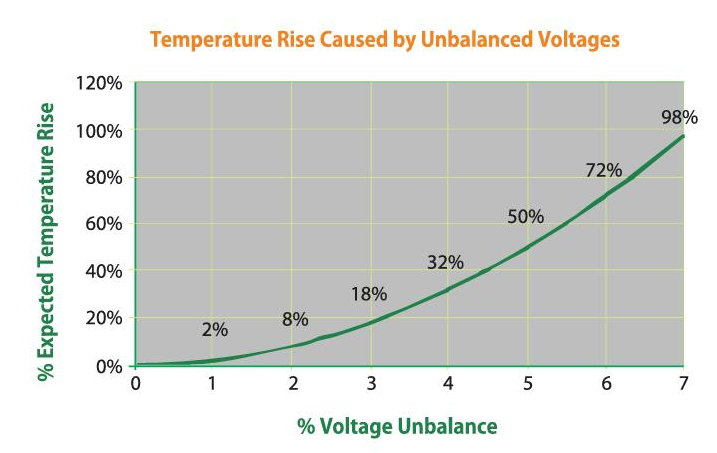
Source: Energy Eff Guide book for the Electrical Engineers

Electrical motor will run hotter when operating voltage is unbalanced.
Winding insulation life is reduced by one half for the each 10 deg cel increase in operating temperation.

# Voltage unbalance defined by:

###                                            Voltage unbalance = [(Vmax - Vmin)/Vavg]x100  where Vavg = (V12+V23+V31)/3

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('voltage.csv')

In [3]:
dataset.head(2)

,DeviceTime,V12,V23,V31
0,6/25/2021 0:00,413.4284,413.4284,413.6016
1,6/25/2021 1:00,413.4284,413.4284,413.6016


In [4]:
dataset.set_index(['DeviceTime'],inplace=True)

array([<AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>], dtype=object)

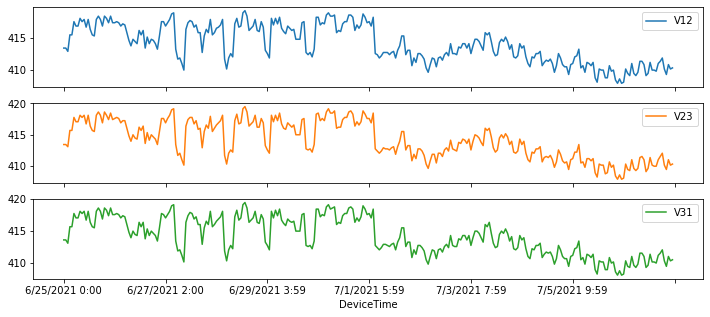

In [5]:
dataset.plot(subplots=True, figsize=(12,5))

Below are the observation:
1. Hourly variation observed in the voltages.
2. After the 1-Jul-2019 the votage behaviour has changed.

In [15]:
#Perfroming EDA

In [14]:
# !pip install autoviz

In [16]:
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set loaded: (300, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
DeviceTime,300,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
V23,67,float64,0,0.000000,22.333333,0,
V12,63,float64,0,0.000000,21.000000,0,
V31,63,float64,0,0.000000,21.000000,0,


    4 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['DeviceTime']
Number of All Scatter Plots = 6
No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


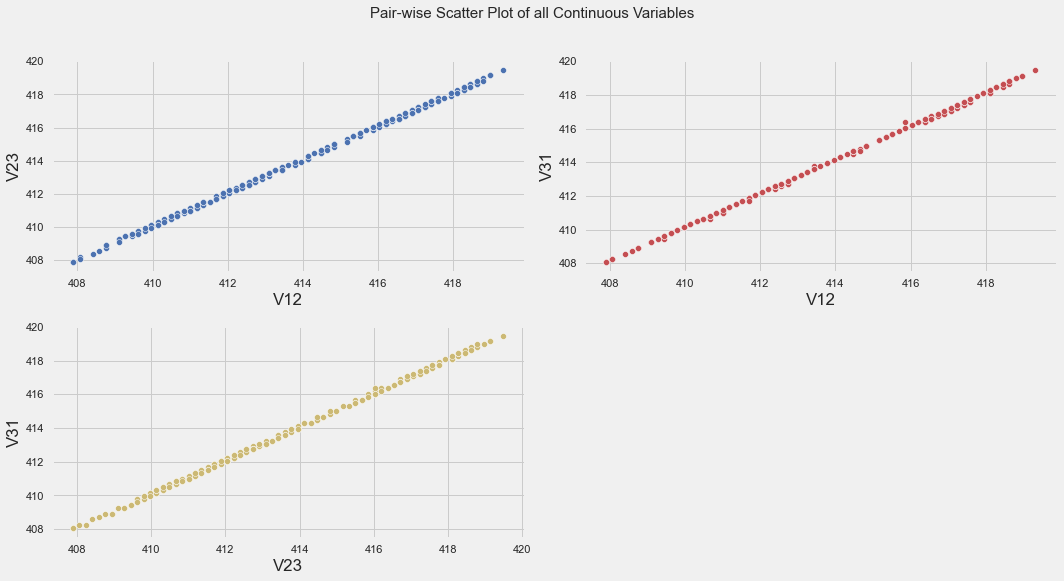

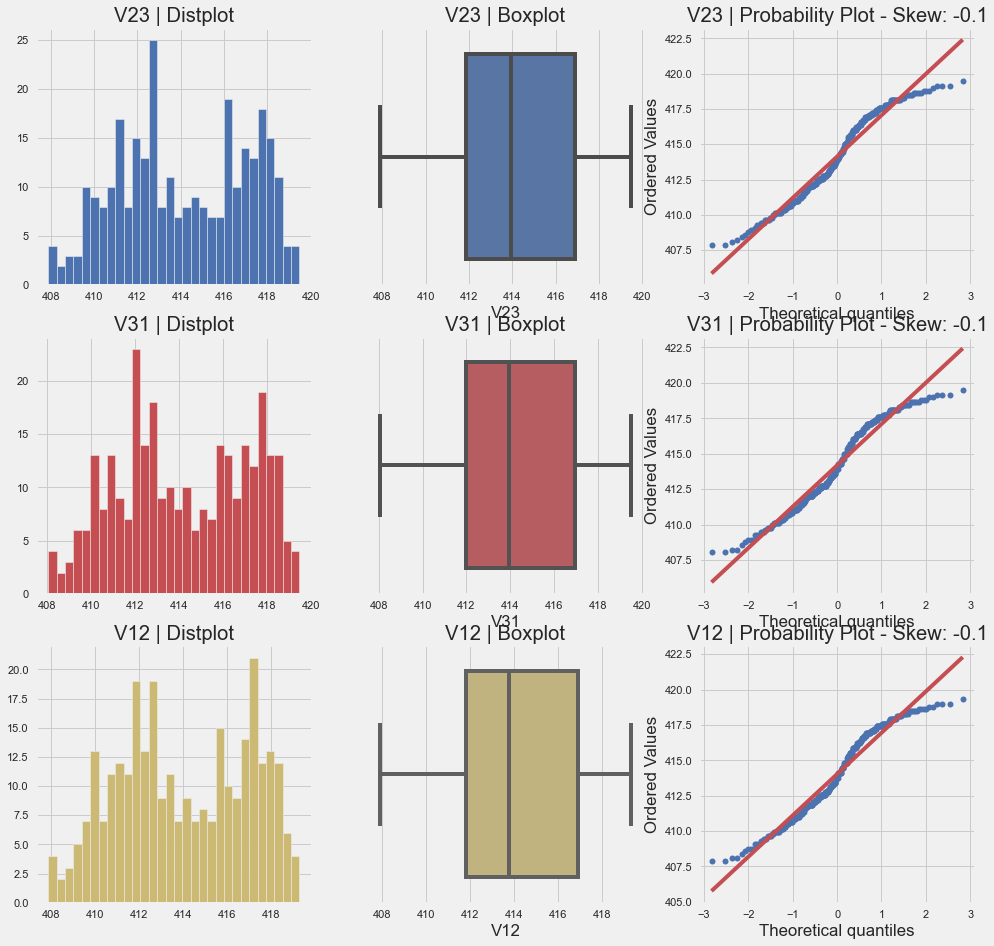

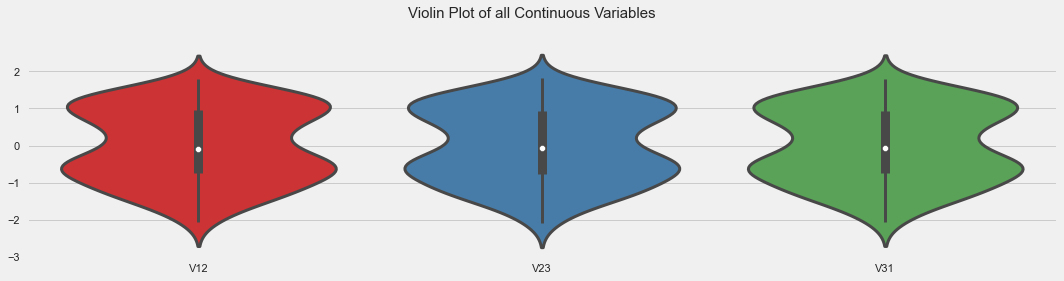

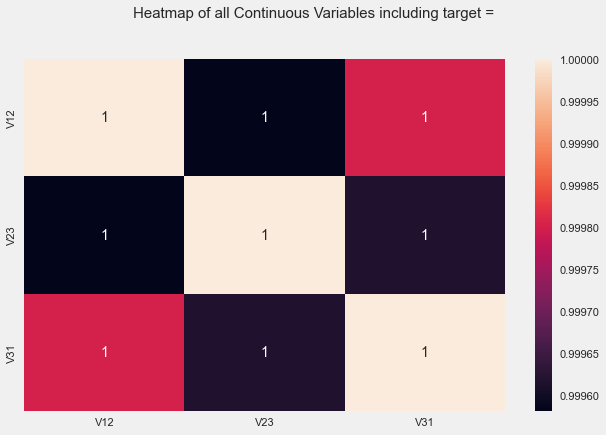

In [17]:
EDA_dataset=AutoViz_Class().AutoViz('voltage.csv')

dataset is cleaned, no missing value and null values

# Feature Engineering

In [7]:
dataset['max_voltage']=dataset.max(axis=1)
dataset['min_voltage']=dataset.min(axis=1)

In [8]:
dataset['Average_voltage']=dataset['V12']/3+dataset['V23']/3+dataset['V31']/3

In [9]:
dataset['unbalance_volt_per']=((dataset['max_voltage']-dataset['min_voltage'])/dataset['Average_voltage'])*100

In [10]:
dataset.columns

Index(['V12', 'V23', 'V31', 'max_voltage', 'min_voltage', 'Average_voltage',
       'unbalance_volt_per'],
      dtype='object')

In [11]:
dataset

,V12,V23,V31,max_voltage,min_voltage,Average_voltage,unbalance_volt_per
DeviceTime,,,,,,,
6/25/2021 0:00,413.4284,413.4284,413.6016,413.6016,413.4284,413.486133,0.041888
6/25/2021 1:00,413.4284,413.4284,413.6016,413.6016,413.4284,413.486133,0.041888
6/25/2021 2:00,412.9088,413.0820,413.0820,413.0820,412.9088,413.024267,0.041935
6/25/2021 3:00,415.5068,415.6800,415.6800,415.6800,415.5068,415.622267,0.041672
6/25/2021 4:00,415.5068,415.6800,415.6800,415.6800,415.5068,415.622267,0.041672
...,...,...,...,...,...,...,...
7/7/2021 6:59,410.1376,410.1376,410.3108,410.3108,410.1376,410.195333,0.042224
7/7/2021 7:59,409.2716,409.4448,409.4448,409.4448,409.2716,409.387067,0.042307
7/7/2021 8:59,410.8304,411.0036,411.0036,411.0036,410.8304,410.945867,0.042147


array([<AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>,
       <AxesSubplot:xlabel='DeviceTime'>], dtype=object)

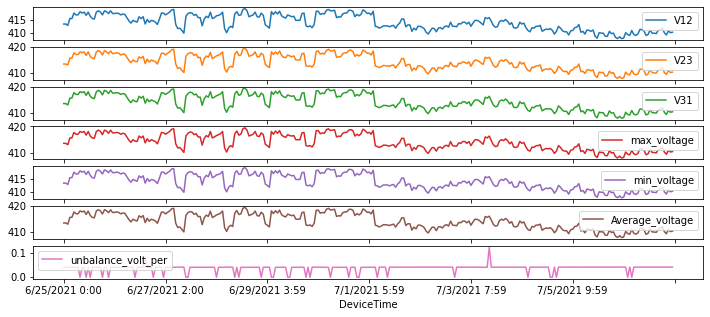

In [12]:
dataset.plot(subplots=True, figsize=(12,5))

In [13]:
dataset_n=dataset.drop(['V12', 'V23', 'V31', 'max_voltage', 'min_voltage'],axis=1)

Unbalanced currents and reverse rotation from voltage unbalance produce ebergy wastage and reduces motor efficiency. The reduction in motor efficiency is proportional to the unbalanced and more pronounced at reduced motor load

# Split the dataset

In [28]:
X = dataset_n.iloc[:, :-1].values
y = dataset_n.iloc[:, -1].values

In [29]:
X

array([[413.48613333],
       [413.48613333],
       [413.02426667],
       [415.62226667],
       [415.62226667],
       [417.70066667],
       [417.00786667],
       [417.00786667],
       [418.1048    ],
       [417.70066667],
       [418.04706667],
       [416.7192    ],
       [418.04706667],
       [416.3728    ],
       [415.62226667],
       [415.44906667],
       [418.04706667],
       [418.56666667],
       [418.04706667],
       [416.8924    ],
       [418.56666667],
       [418.16253333],
       [417.412     ],
       [418.50893333],
       [417.46973333],
       [417.52746667],
       [417.70066667],
       [417.52746667],
       [416.95013333],
       [417.29653333],
       [417.18106667],
       [415.96866667],
       [414.75626667],
       [413.89026667],
       [414.92946667],
       [414.4676    ],
       [414.23666667],
       [416.25733333],
       [415.62226667],
       [416.31506667],
       [413.6016    ],
       [415.27586667],
       [414.17893333],
       [414

In [30]:
y

array([0.04188774, 0.04188774, 0.04193458, 0.04167245, 0.04167245,
       0.0414651 , 0.04153399, 0.04153399, 0.        , 0.0414651 ,
       0.04143074, 0.        , 0.04143074, 0.        , 0.04167245,
       0.04168983, 0.04143074, 0.04137931, 0.04143074, 0.        ,
       0.04137931, 0.0414193 , 0.        , 0.04138502, 0.04148804,
       0.0414823 , 0.0414651 , 0.0414823 , 0.04153974, 0.04150526,
       0.04151675, 0.04163775, 0.04175947, 0.04184684, 0.04174203,
       0.        , 0.04181185, 0.04160888, 0.04167245, 0.04160311,
       0.08375209, 0.04170722, 0.04181767, 0.04174203, 0.        ,
       0.04181185, 0.04189944, 0.04168983, 0.04147083, 0.        ,
       0.04153974, 0.0414823 , 0.04143074, 0.04134509, 0.04132801,
       0.04189944, 0.04206394, 0.04204036, 0.04213483, 0.04223568,
       0.        , 0.        , 0.04145364, 0.0414651 , 0.041557  ,
       0.04151675, 0.04164353, 0.04163775, 0.04195217, 0.04168983,
       0.04158581, 0.04163775, 0.04143646, 0.04167824, 0.04163

In [31]:
print(X.shape), print(y.shape)

(300, 1)
(300,)


(None, None)

## Training the Linear Regression model on the whole dataset

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

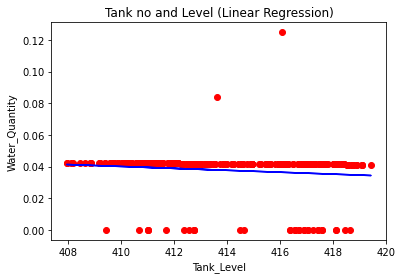

In [34]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Tank no and Level (Linear Regression)')
plt.xlabel('Tank_Level')
plt.ylabel('Water_Quantity')
plt.show()

## Visualising the Polynomial Regression results

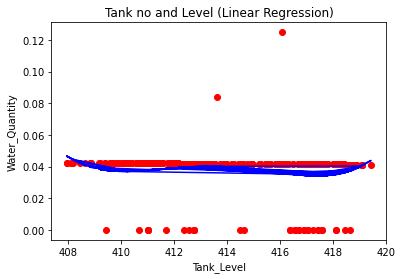

In [35]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Tank no and Level (Linear Regression)')
plt.xlabel('Tank_Level')
plt.ylabel('Water_Quantity')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

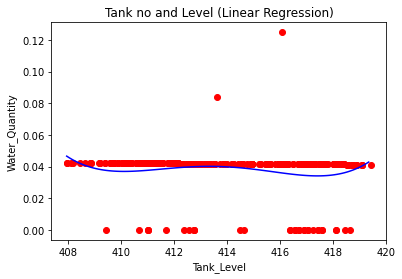

In [36]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Tank no and Level (Linear Regression)')
plt.xlabel('Tank_Level')
plt.ylabel('Water_Quantity')
plt.show()

## Predicting a new result with Linear Regression

In [41]:
lin_reg.predict([[409]])

array([0.04075016])

## Predicting a new result with Polynomial Regression

In [42]:
lin_reg_2.predict(poly_reg.fit_transform([[409]]))

array([0.03898248])

# Suggestion Action to prevent the Motor

Collect the data for the other electrical motor in utility and perform the EDA then model it.

Regular Moniter the voltage at the motor terminal to verify that voltage balanced is maintain below 1%.

Check the single line diagram and the single phase load are evenly distributed. 

Install ground fault indicators  as required and perform annual thermography inspection.